In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

# %matplotlib inline
# %matplotlib notebook

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('cars_cleaned.csv', parse_dates=True, encoding = "ISO-8859-1", low_memory=False, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 32262 non-null  int64  
 1   Model                32262 non-null  object 
 2   Specs                32262 non-null  object 
 3   MSRP                 32262 non-null  int64  
 4   EPA_Class            30286 non-null  object 
 5   Body_Stype           30546 non-null  object 
 6   Drivetrain           30546 non-null  object 
 7   Psg_Cp               32262 non-null  int64  
 8   Psg_Doors            32262 non-null  int64  
 9   Front_Wheel_Mat      30293 non-null  object 
 10  Rear_Wheel_Mat       30293 non-null  object 
 11  Basic_Miles          29879 non-null  float64
 12  Basic_Year           30145 non-null  float64
 13  Drivetrain_Miles     29076 non-null  float64
 14  Drivetrain_Years     29374 non-null  float64
 15  Road_Assist_Miles    19088 non-null 

In [3]:
df

,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,2019,Acura RDX,Acura RDX Specs: FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3790.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
1,2019,Acura RDX,Acura RDX Specs: FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3829.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
2,2019,Acura RDX,Acura RDX Specs: FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3821.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
3,2019,Acura RDX,Acura RDX Specs: FWD,37400,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,3783.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,11,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
4,2019,Acura RDX,Acura RDX Specs: AWD w/Technology Pkg,42600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,4026.0,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,2018,Volvo V60 Cross Country,Volvo V60 Cross Country Specs: T5 AWD Platinum,45700,Mid-Size Station Wagon,4dr Car,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,50000.0,4.0,NaN,4.0,210.0,36000.0,3.0,NaN,DSTC Electronic Stability Control (ESC)\r\r\nA...,3920.0,NaN,NaN,73.4,60.8,182.6,105.600000,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.8,25.0,22.0,30.0,Strut,Strut,Multi-Link,Multi-Link,8.0,760.0,258.0,240.0,Intercooled Turbo Regular Unleaded I-4,2.0,300000.0,12.0
32258,2016,Volvo V60 Cross Country,Volvo V60 Cross Country Specs: 4-Door Wagon T5...,41200,Mid-Size Station Wagon,4dr Car,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,

In [4]:
# the following cells were found too high, correct two weight values after checking data 
# at https://www.thecarconnection.com/price/honda_pilot_2019_lx-2wd
print(df.loc[14596, 'Weight'], df.loc[14603, 'Weight'])

df.loc[14596, 'Weight']=4036
df.loc[14603, 'Weight']=4036

8591.0 8232.0


### Check missing cells

In [5]:
# major features selected for the purpose of this practice
essential_features = ['Year', 'Model', 'Specs', 'MSRP', 'Weight', 'HP1', 'Displacement', 'Num_safety']

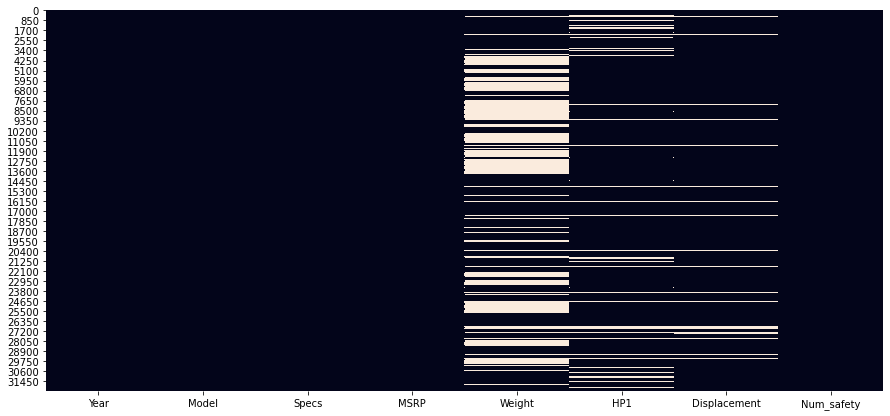

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df[essential_features].isnull(), cbar=False)
plt.savefig('missing for important features.png')
plt.show()

In [8]:
len(df.columns)

63

In [12]:
list(df.columns)[:32]

['Year',
 'Model',
 'Specs',
 'MSRP',
 'EPA_Class',
 'Body_Stype',
 'Drivetrain',
 'Psg_Cp',
 'Psg_Doors',
 'Front_Wheel_Mat',
 'Rear_Wheel_Mat',
 'Basic_Miles',
 'Basic_Year',
 'Drivetrain_Miles',
 'Drivetrain_Years',
 'Road_Assist_Miles',
 'Road_Assist_Years',
 'Max_Alt_Cp',
 'Maint_Miles',
 'Maint_Year',
 'Max_Alt_Watts',
 'Other_Features',
 'Weight',
 'Trailer_cpt',
 'Volume',
 'Width',
 'Height',
 'Length',
 'Size_avg',
 'Airbag_Front_Driver',
 'Airbag_Front_Psg',
 'Airbag_Psg_Switch']

In [11]:
a

Index(['Year', 'Model', 'Specs', 'MSRP', 'EPA_Class', 'Body_Stype',
       'Drivetrain', 'Psg_Cp', 'Psg_Doors', 'Front_Wheel_Mat',
       'Rear_Wheel_Mat', 'Basic_Miles', 'Basic_Year', 'Drivetrain_Miles',
       'Drivetrain_Years', 'Road_Assist_Miles', 'Road_Assist_Years',
       'Max_Alt_Cp', 'Maint_Miles', 'Maint_Year', 'Max_Alt_Watts',
       'Other_Features', 'Weight', 'Trailer_cpt', 'Volume', 'Width', 'Height',
       'Length', 'Size_avg', 'Airbag_Front_Driver', 'Airbag_Front_Psg',
       'Airbag_Psg_Switch'],
      dtype='object')

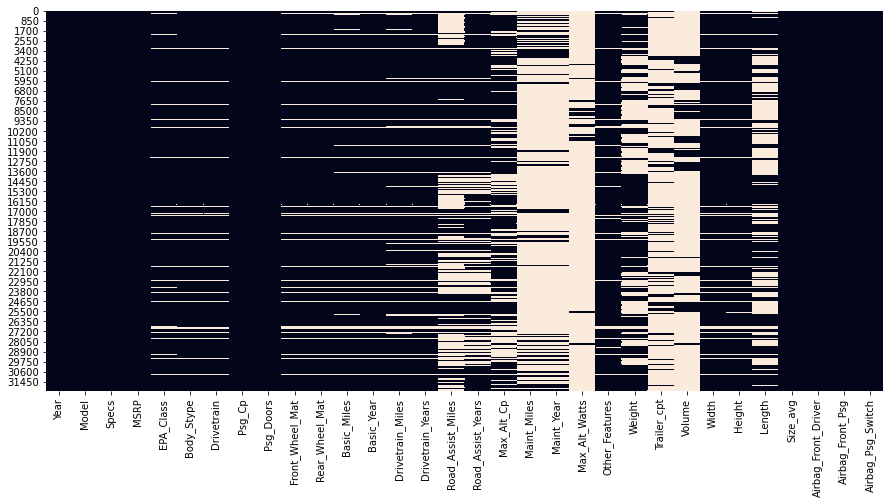

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df[list(df.columns)[:32]].isnull(), cbar=False)
plt.savefig('missing2-1.png')
plt.show()

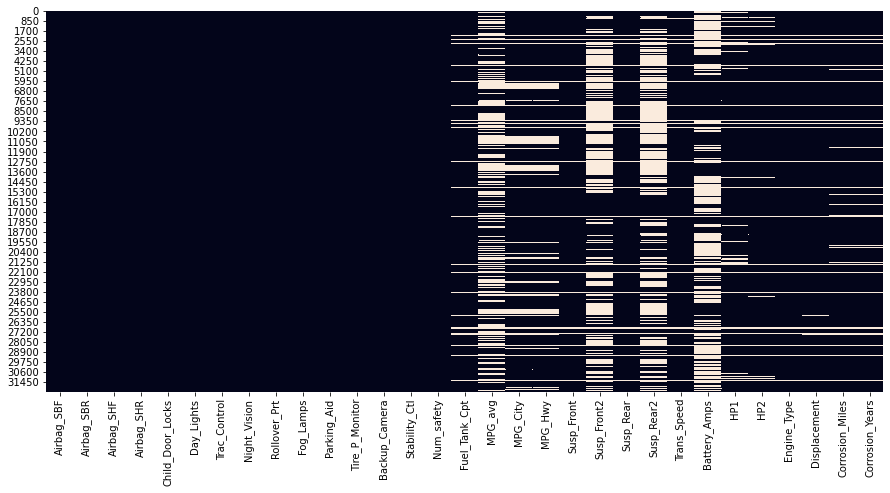

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df[list(df.columns)[32:]].isnull(), cbar=False)
plt.savefig('missing2-2.png')
plt.show()

In [ ]:
df.head(3)

## Overal price distribution

178


<Figure size 1440x720 with 0 Axes>

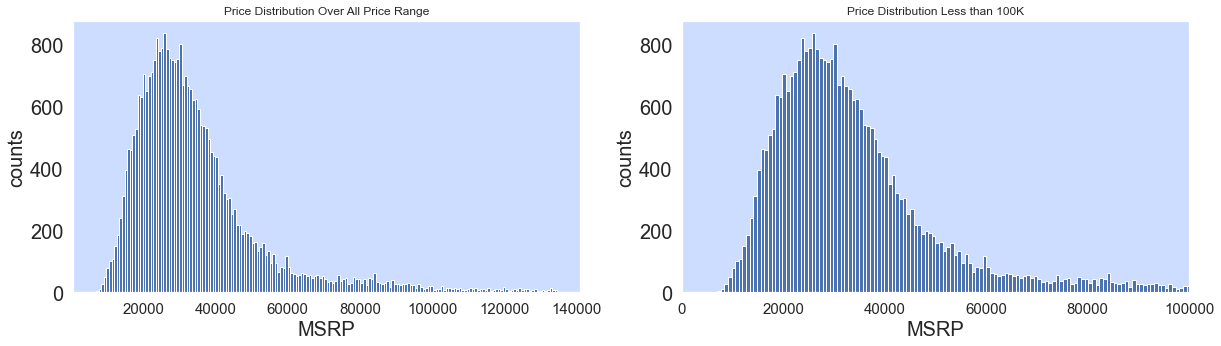

In [26]:
bin_data = np.sqrt(len(df['MSRP']))
bin_num = int(bin_data)
print(bin_num)
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].hist(df['MSRP'], bins=bin_num)
axs[0].set_xlabel('MSRP')
axs[0].set_ylabel('counts')
axs[0].set_title('Price Distribution Over All Price Range')

axs[1].set_xlim(0, 100000)
axs[1].hist(df['MSRP'], bins=bin_num)
axs[1].set_xlabel('MSRP')
axs[1].set_ylabel('counts')
axs[1].set_title('Price Distribution Less than 100K')
plt.savefig('pricedist.png')
# how to rotate tick labels
# axs[1].tick_params(labelrotation=45)
plt.show()

In [18]:
y, x, _ = plt.hist(df['MSRP'])
print('Most frequent prices are around:', y.max())

Most frequent prices are around: 29295.0


## Drop outliers

In [19]:
# define price outliers and drop them
df_outlier_removed = df[((df['MSRP'] - df['MSRP'].mean()) / df['MSRP'].std()).abs() < 3]
df = df_outlier_removed.reset_index(drop=True)

## Toyota car prices survey

In [20]:
df_toyota = df[df['Model'].str.contains('Toyota')]

<Figure size 432x288 with 0 Axes>

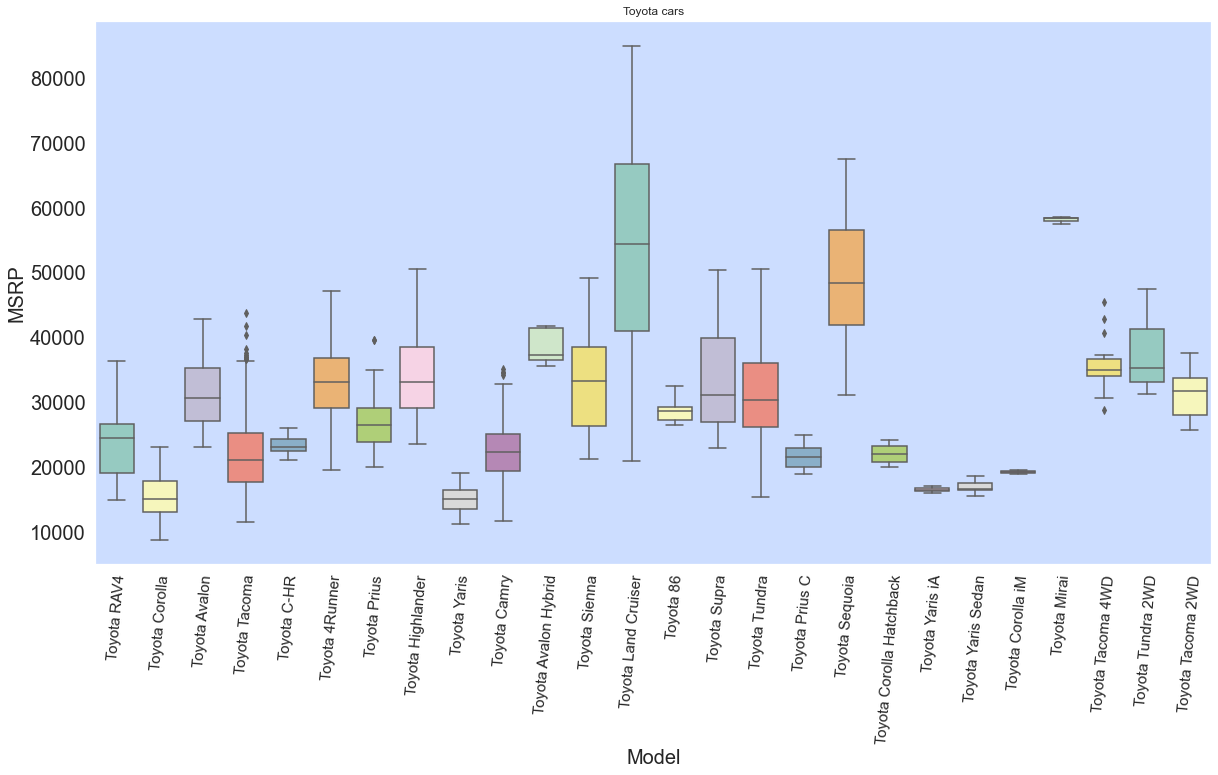

In [21]:
plt.clf()
sns.set(rc={"axes.facecolor":"#ccddff",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':15,
            'ytick.labelsize':20})

plt.figure(figsize=(20,10))
sns.boxplot(x="Model", y="MSRP", data=df_toyota, palette="Set3") # notch=True
plt.xticks(rotation=85)
plt.title('Toyota cars')

# plt.text(20, 0, "Box Plot", fontsize = 55, color="black", fontstyle='italic')
plt.show()

## Find high-end and low-end car models from Toyota

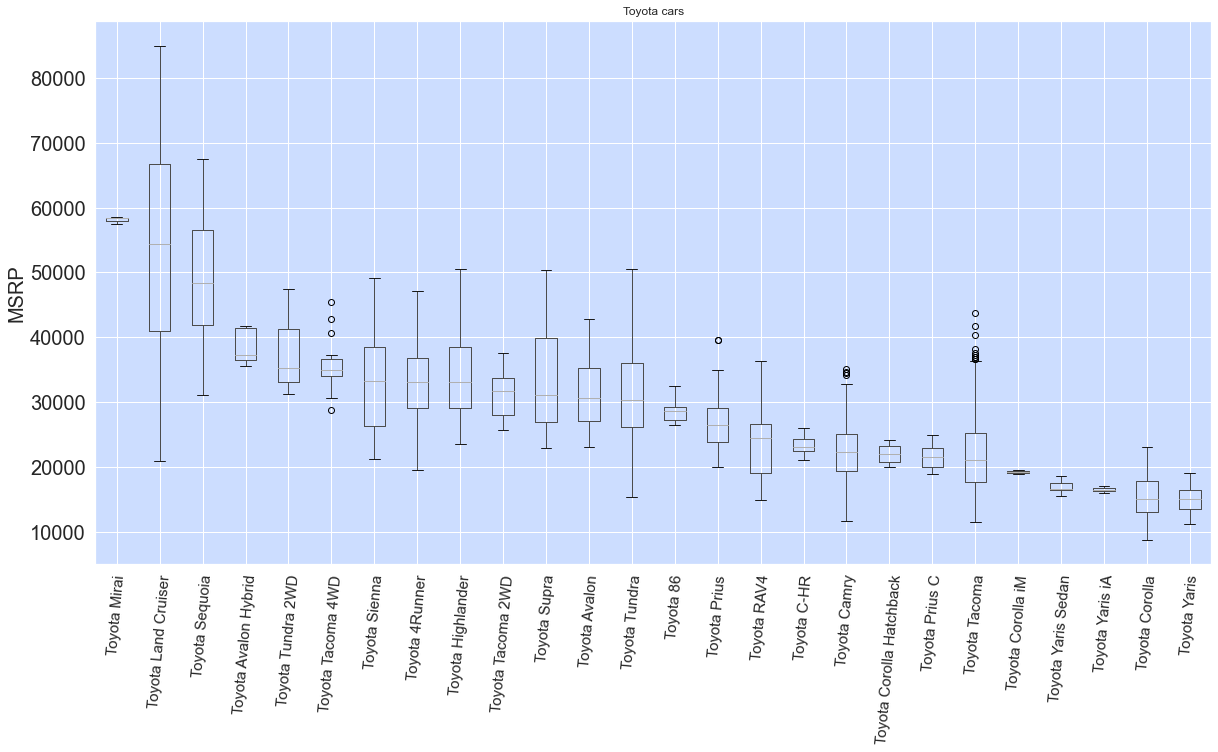

In [22]:
grouped = df_toyota.groupby(['Model'])

df_ = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

medians = df_.median()
medians = medians.sort_values(ascending=False)
df_ = df_[medians.index]



df_.boxplot()
plt.xticks(rotation=85)
plt.ylabel('MSRP')
plt.title('Toyota cars')
plt.savefig('toyota_price.png', bbox_inches="tight")
plt.show()

Luxury Toyota models include Mirai, Land Cruiser, Sequoia, etc. Low-end models include Yaris, Corolla, etc.

## Honda cars prices survey

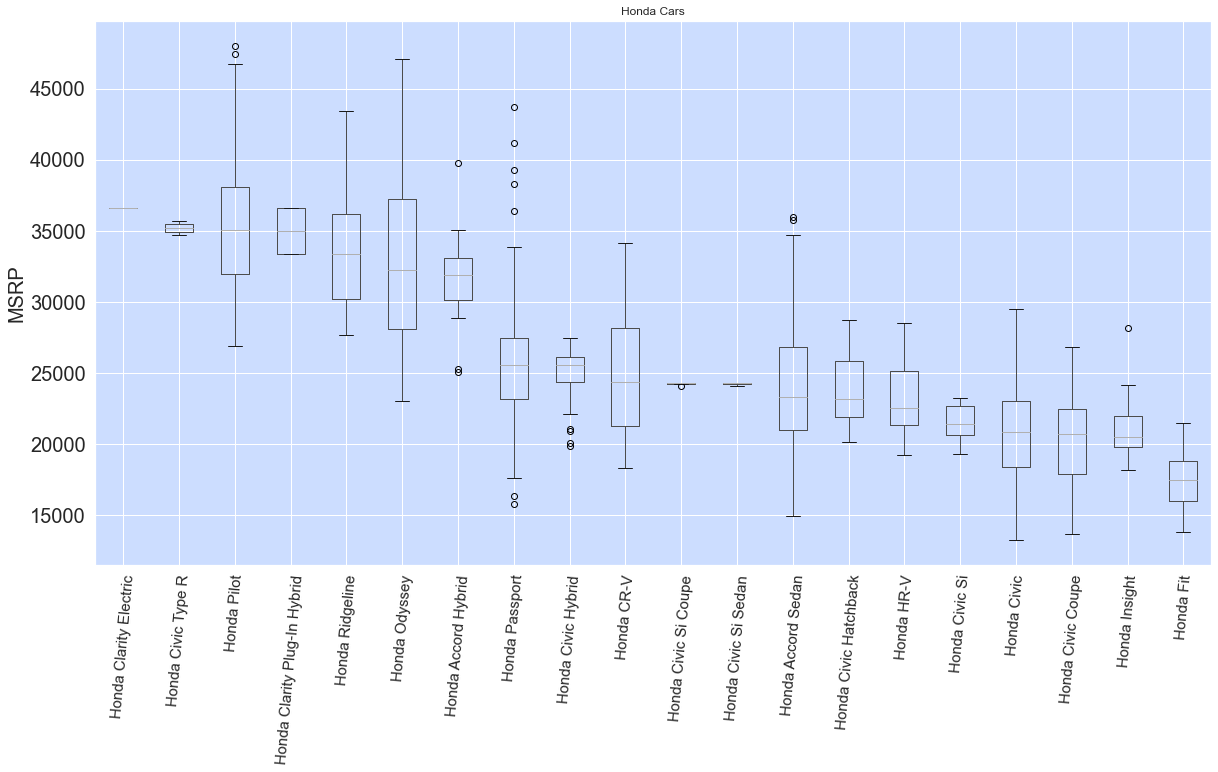

In [23]:

df_honda = df[df['Model'].str.contains('Honda')]
grouped = df_honda.groupby(['Model'])

df_ = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

meds = df_.median()
meds = meds.sort_values(ascending=False)
df_ = df_[meds.index]

df_.boxplot()
plt.xticks(rotation=85)
plt.ylabel('MSRP')
plt.title('Honda Cars')
plt.savefig('honda_price.png', bbox_inches="tight")
plt.show()

High-end Honda models include Clarity, Civic R, Pilot, etc. Low-end models include Fit, Insight, Civic Coupe, etc.

## Buying guide for budget-tight customers (price<$25,000)

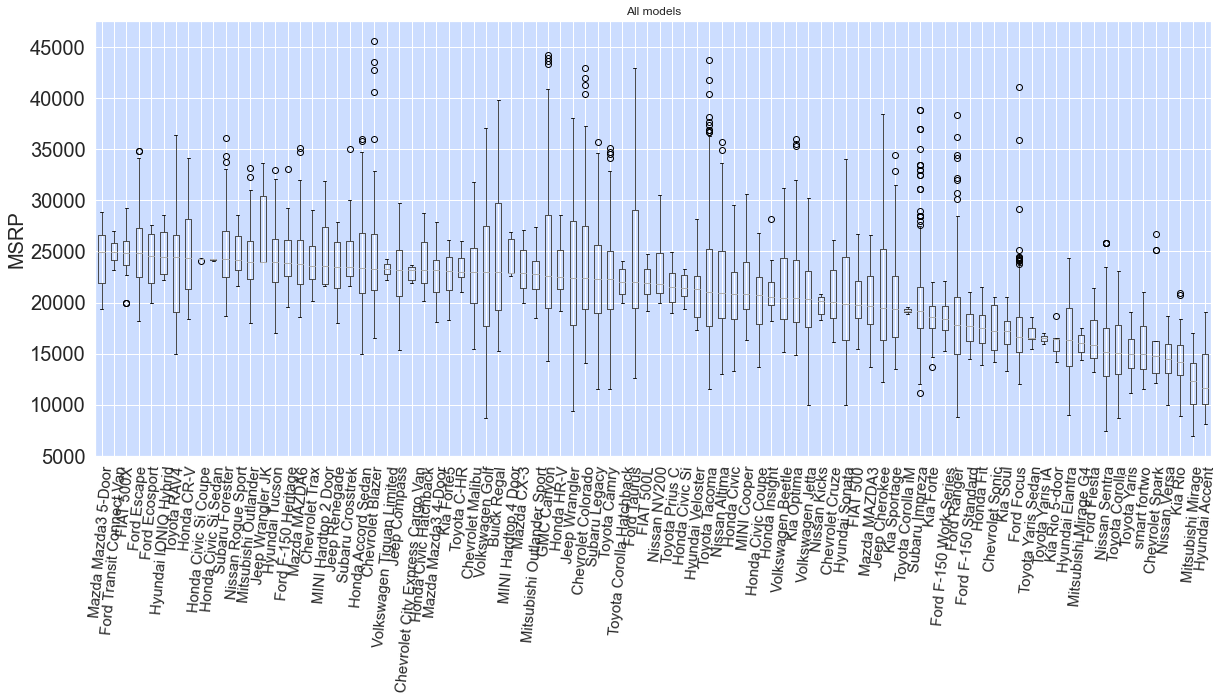

In [24]:
grouped = df.groupby(['Model'])

df_ = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

medians = df_.median()
medians = medians[medians < 25000]
medians = medians.sort_values(ascending=False)
df_ = df_[medians.index]
plt.figure(figsize=(20, 8))

sns_plot = df_.boxplot()
plt.xticks(rotation=85)
plt.ylabel('MSRP')
plt.title('All models')
# plt.savefig('under25k.png')
sns_plot.figure.savefig("under25k.png", bbox_inches="tight")
plt.show()

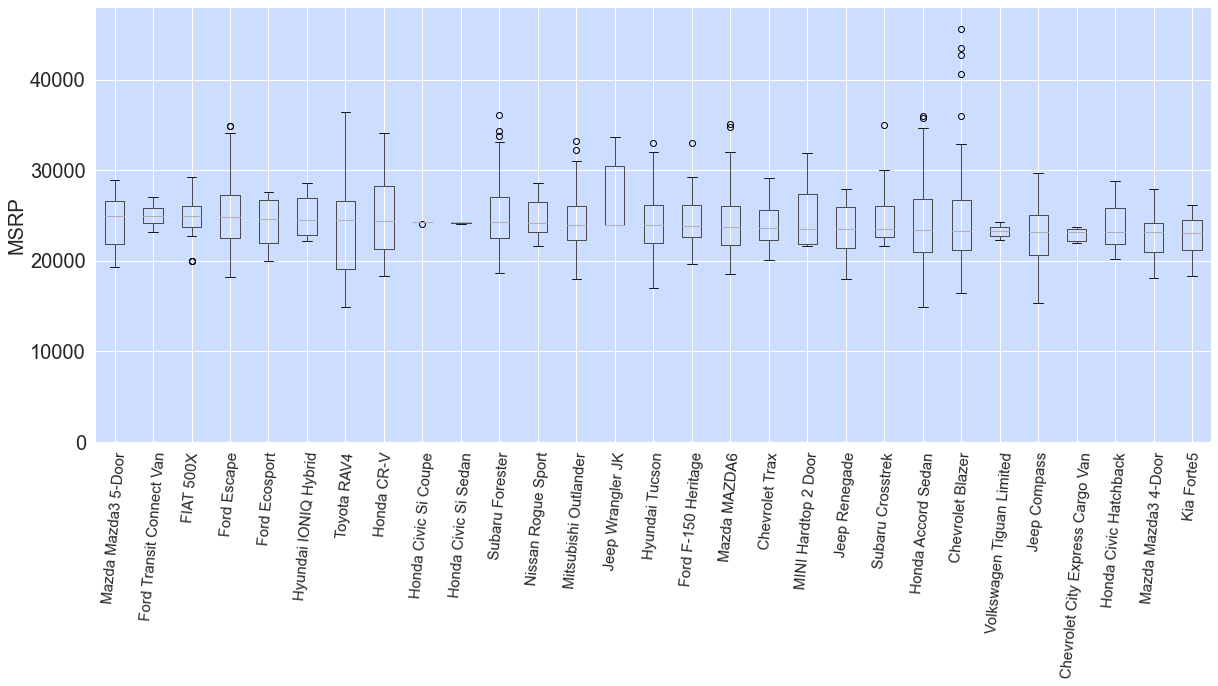

In [42]:
temp = df_[medians.index[:29]]
# plt.figure
fig, ax = plt.subplots(figsize=(20, 8))
sns_plot = temp.boxplot()
ax.set_ylim(0, 48000)
plt.xticks(rotation=85)
plt.ylabel('MSRP')
# plt.title('All models')
# plt.savefig('under25k.png')
sns_plot.figure.savefig("under25k.png", bbox_inches="tight")
plt.show()

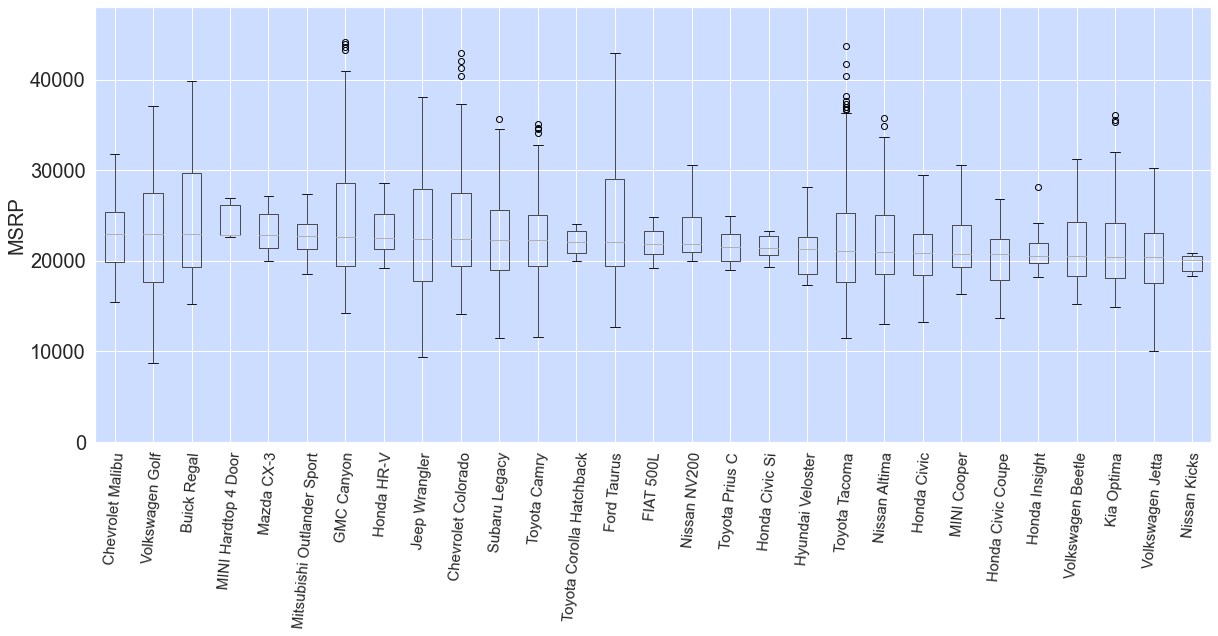

In [43]:
temp = df_[medians.index[30:59]]
fig, ax = plt.subplots(figsize=(20, 8))
sns_plot = temp.boxplot()
ax.set_ylim(0, 48000)
plt.xticks(rotation=85)
plt.ylabel('MSRP')
# plt.title('All models')
# plt.savefig('under25k.png')
sns_plot.figure.savefig("under25k.png", bbox_inches="tight")
plt.show()

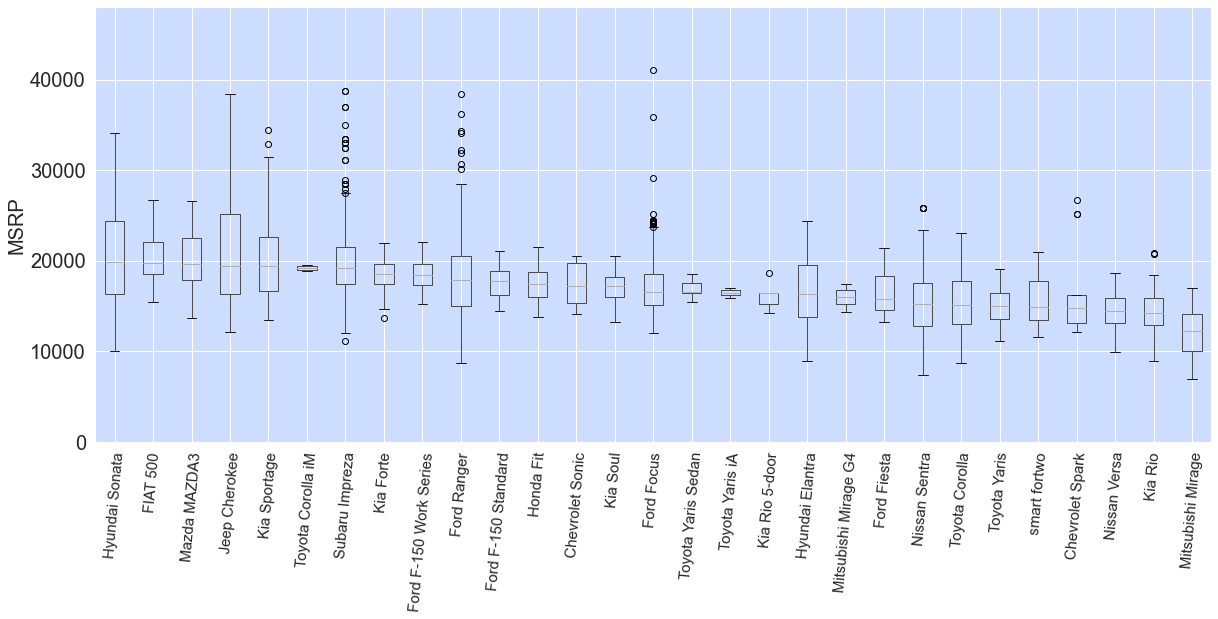

In [44]:
temp = df_[medians.index[60:-1]]
fig, ax = plt.subplots(figsize=(20, 8))
sns_plot = temp.boxplot()
ax.set_ylim(0, 48000)
plt.xticks(rotation=85)
plt.ylabel('MSRP')
# plt.title('All models')
# plt.savefig('under25k.png')
sns_plot.figure.savefig("under25k.png", bbox_inches="tight")
plt.show()

In [30]:
medians.index[:44]

Index(['Mazda Mazda3 5-Door', 'Ford Transit Connect Van', 'FIAT 500X',
       'Ford Escape', 'Ford Ecosport', 'Hyundai IONIQ Hybrid', 'Toyota RAV4',
       'Honda CR-V', 'Honda Civic Si Coupe', 'Honda Civic Si Sedan',
       'Subaru Forester', 'Nissan Rogue Sport', 'Mitsubishi Outlander',
       'Jeep Wrangler JK', 'Hyundai Tucson', 'Ford F-150 Heritage',
       'Mazda MAZDA6', 'Chevrolet Trax', 'MINI Hardtop 2 Door',
       'Jeep Renegade', 'Subaru Crosstrek', 'Honda Accord Sedan',
       'Chevrolet Blazer', 'Volkswagen Tiguan Limited', 'Jeep Compass',
       'Chevrolet City Express Cargo Van', 'Honda Civic Hatchback',
       'Mazda Mazda3 4-Door', 'Kia Forte5', 'Toyota C-HR', 'Chevrolet Malibu',
       'Volkswagen Golf', 'Buick Regal', 'MINI Hardtop 4 Door', 'Mazda CX-3',
       'Mitsubishi Outlander Sport', 'GMC Canyon', 'Honda HR-V',
       'Jeep Wrangler', 'Chevrolet Colorado', 'Subaru Legacy', 'Toyota Camry',
       'Toyota Corolla Hatchback', 'Ford Taurus'],
      dtype='object'

## Price evolution over the years

In [ ]:
df['Year'].unique()

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

In [ ]:
df_toyota = df[df['Model'].str.contains('Toyota')]
df_toyota = df_toyota[['Year', 'MSRP']]
df_toyota = df_toyota.set_index('Year')
df_toyota = df_toyota.resample('A').mean()

df_toyota['MSRP'].plot()
plt.ylabel('MSRP')
plt.title('Toyota MSRP Mean vs. Year')
plt.savefig('toyota_msrp_year.png')
plt.show()

In [ ]:
df_honda = df[df['Model'].str.contains('Honda')]
df_honda = df_honda[['Year', 'MSRP']]
df_honda = df_honda.set_index('Year')
df_honda = df_honda.resample('A').mean()

df_honda['MSRP'].plot()
plt.ylabel('MSRP')
plt.title('Honda MSRP Mean vs. Year')
plt.savefig('honda_msrp_year.png')
plt.show()

- Car prices have been constantly increasing generally linearly over the last two decades.

## Car prices distribution

In [ ]:
df_HC = df['MSRP'][df['Model'] == 'Honda Civic']
df_HA = df['MSRP'][df['Model'] == 'Hyundai Accent']

In [ ]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / n
    return x, y    

In [ ]:
# change back to plt style
sns.reset_orig()

plt.figure(figsize=(7, 5))
x, y = ecdf(df_HC)
plt.plot(x, y, marker='.', linestyle='none', label='Honda Civic')
x, y = ecdf(df_HA)
plt.plot(x, y, marker='.', linestyle='none', label='Hyundai Accent')
plt.xlabel('MSRP')
plt.ylabel('count')
plt.title('empirical cumulative distribution curve')
plt.legend()
plt.savefig('ecdf.png')
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
bins = int(np.sqrt(len(df_HC)))
plt.hist(df_HC, bins, density=True, facecolor='g', alpha=0.75, label='Honda Civic')
bins = int(np.sqrt(len(df_HA)))
plt.hist(df_HA, bins, density=True, facecolor='r', alpha=0.75, label='Hyundai Accent')
plt.xlabel('price')
plt.ylabel('count')
plt.legend()
plt.title('priced distribution of Honda Civic and Hyndai Accent')
plt.savefig('civic_accent.png', bbox_inches="tight")

plt.show()

Both the histogram and empirical cumulative distribution curves indicate clear difference in the mean price of the concerned car models.

To quantify the difference of mean statiscally, Bootstrap approach seems to be appropriate.

- H0: There is no difference in the mean price between Hyundai Accent and Honda Civic.
- Ha: There is obviouse difference in the mean price between Hyundai Accent and Honda Civic.
- alpha: 5%

In [ ]:
# Two sample mean bootstrap function
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def func(data1, data2):
    return data1.mean() - data2.mean()

sample_mean_diff = func(df_HC, df_HA)
bs_data = draw_perm_reps(df_HC, df_HA, func, size=10000)
p_value = np.sum(bs_data > sample_mean_diff) / len(bs_data)
print('p-value is:', p_value)

In [ ]:
plt.figure(figsize=(7, 5))
bins = int(np.sqrt(len(bs_data)))
plt.hist(bs_data, bins, label='bootstrap')
plt.vlines(sample_mean_diff, 0, 30, color='r', label='sample')
plt.xlabel('price difference, $')
plt.ylabel('count')
plt.legend()
plt.title('bootstramp price mean difference results')
plt.savefig('bs_price_diff.png')
plt.show()

p-value is zero, therefore we reject the null hypothesis and approve the sharp difference in mean. The bootstrap results is ploted in the above figure, strongly supporting there is signicant difference in mean.

## Explore the correlation of features

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df['Weight'], df['MSRP'], marker='.', markersize=3, alpha=0.75, linestyle='none')
plt.xlabel('Weight')
plt.ylabel('MSRP')
plt.title('price vs weight (all years, all models)')
plt.savefig('msrp_weight.png')
plt.show()

In [ ]:
weight_2018 = df['Weight'].where(df['Year'].dt.year==2018)
MSRP_2018 = df['MSRP'].where(df['Year'].dt.year==2018)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax1 = ax[0]
ax2 = ax[1]

ax1.plot(weight_2018, MSRP_2018, '.')
ax1.set_xlabel('Weight')
ax1.set_ylabel('MSRP')
ax1.set_title('Most Recent Year 2018')

ax2.plot(weight_2018, MSRP_2018, '.')
ax2.set_ylim(-2200, 100000)
ax2.set_xlabel('Weight')
ax2.set_ylabel('MSRP')
ax2.set_title('Most Recent Year 2018')
plt.savefig('msrp_weight2.png')
plt.show()

- It is noticed that the bottom one in the price range with the same weight is almost linearly proportional to price. 

In [ ]:
plt.plot(df['Displacement'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Engine Displacement')
plt.ylabel('MSRP')
plt.show()

With increasing engine displacement, there is a wider price range or model choices. 

In [ ]:
df_ = df[df['Size_avg'] != 0]
plt.plot(df_['Size_avg'], df_['MSRP'], marker='.', linestyle='none')
plt.xlabel('car size')
plt.ylabel('MSRP')
plt.title('MSRP vs car size')
plt.savefig('msrp_size.png', bbox_inches="tight")
plt.show()

Car sizes are aggregated or clustered. No obvious trend for the price related to size.

In [ ]:
df[essential_features][df['Size_avg']==0].head()

In [ ]:
plt.plot(df['HP1'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Horse Power')
plt.ylabel('MSRP')
plt.show()

## MSRP vs. Horsepower

In [ ]:
plt.plot(df['HP1'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Horse Power')
plt.ylabel('MSRP')
plt.title('MSRP vs. Horsepower')
plt.show()

-Find and remove outliers

- A single outlier was found to be about 3400 horsepower, which is unreasonable. The following code is to locate the entry and make correction.

In [ ]:
# locate the outlier
df['HP1'][df['HP1'] > 3000]

In [ ]:
# it was found that decimal place was set by mistake; correct the value by dividing by 10
df['HP1'].apply(lambda x: x/10 if x>1500 else x)

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

def linregplt(feature_X, feature_y): # df['colname']
    X = feature_X.values.reshape(-1,1)
    y = feature_y.values.reshape(-1,1)
    
    # Create the regressor: reg
    reg = LinearRegression()

    # Create the prediction space
    prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

    # Fit the model to the data
    reg.fit(X, y)

    # Compute predictions over the prediction space: y_pred
    y_pred = reg.predict(prediction_space)

    # Print R^2 
    print('r^2:', reg.score(X, y))

    # Plot regression line
    plt.plot(X, y, marker='.', linestyle='none')
    plt.plot(prediction_space, y_pred, color='black', linewidth=3)


In [ ]:
df_ = df[df['MSRP'].notna()]
df_ = df[df['HP1'].notna()]
df_

In [ ]:

linregplt(df_['HP1'], df_['MSRP'])
plt.xlabel('horsepower')
plt.ylabel('MSRP')
plt.title('price vs horsepower')
plt.savefig('price_hp.png')
plt.show()

In [ ]:
plt.plot(df['Num_safety'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Number of safety features')
plt.ylabel('MSRP')
plt.title('MSRP vs Number of Safety Features')
plt.show()

Number of safety features has no dramatic effect on car price.

In [ ]:
df_ = df[['Displacement', 'HP1']].dropna()
linregplt(df_['Displacement'], df_['HP1'])
plt.xlabel('engine displacement')
plt.ylabel('horsepower')
plt.title('horsepower vs engine displacement')
plt.savefig('hp_disp.png')
plt.show()

It can be seen that horsepower seems to increase with engine displacement, which agrees with physics.

In [ ]:
plt.plot(df['Weight'], df['HP1'], marker='.', linestyle='none')

plt.xlabel('weight')
plt.ylabel('horsepower')
plt.title('Horsepower vs weight')
plt.show()

In [ ]:
df_ = df[['Year','Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']]
df_ = df_.dropna()
sns.pairplot(df_)
plt.savefig('pairplot.png', bbox_inches="tight")
plt.show()

In [ ]:
df[['Year', 'Model', 'Specs', 'MSRP', 'EPA_Class', 'Body_Stype', 'Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']][df['MPG_avg']>80]

- The above is all-electric cars, explaining why their MPG are outliers.

In [ ]:
corr = df[['Year','Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", center=0)
plt.title('heatmap with correlation coefficients')
plt.savefig('heat_pair.png', bbox_inches="tight")
plt.show()

The heatmap confirms a positive correlation between horsepower and engine displacement, which agrees well with physics and engineering principles. Strong correlation exist between Horsepower and Displacement, size and displacement, horsepower and MPG.

## Explore correlations using 3-D Plots

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Displacement']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('engine displacement')
ax.set_zlabel('price')
plt.savefig('price_hp_disp.png')
plt.show()

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Num_safety']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('number of safety features')
ax.set_zlabel('price')
plt.savefig('price_hp_safety.png')
plt.show()

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['Displacement']
ydata = df['Num_safety']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('engine displacement')
ax.set_ylabel('number of safety features')
ax.set_zlabel('price')
plt.savefig('disp-saf-price.png')
plt.show()

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['Displacement']
ydata = df['Weight']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('engine displacement')
ax.set_ylabel('weight')
ax.set_zlabel('price')
plt.savefig('price_disp_weight.png')
plt.show()

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Weight']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('price')
plt.show()

By exploring combination of any two different features to see their effect on MSRP in the 3D plots, it looks like the following features are well correlated to the car price,
- horsepower
- weight
- engine displacement
- number of safety features